# Task  - 2 Predictive Modeling - Binary Classification 

# Importing Libraries

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

In [66]:
# Load the Titanic dataset
titanic_df = pd.read_csv('Titanic+Data+Set.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [67]:
# Check for missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
# Data preprocessing
# Drop irrelevant columns and handle missing values
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [69]:
# Convert categorical variables to dummy variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex'], drop_first=True)

In [70]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.000000,1,0,7.2500,True
1,1,1,38.000000,1,0,71.2833,False
2,1,3,26.000000,0,0,7.9250,False
3,1,1,35.000000,1,0,53.1000,False
4,0,3,35.000000,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True
887,1,1,19.000000,0,0,30.0000,False
888,0,3,29.699118,1,2,23.4500,False
889,1,1,26.000000,0,0,30.0000,True


In [71]:
# Check for missing values
titanic_df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex_male    0
dtype: int64

In [72]:
# Define features (X) and target variable (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Build and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [82]:
# Make predictions
y_pred = model.predict(X_test)

In [83]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [88]:
print("Accuracy:", accuracy)

Accuracy: 0.8100558659217877


In [89]:
print("Precision:", precision)

Precision: 0.803030303030303


In [90]:
print("Recall:", recall)

Recall: 0.7162162162162162


In [92]:
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7962033462033462


In [93]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[92 13]
 [21 53]]


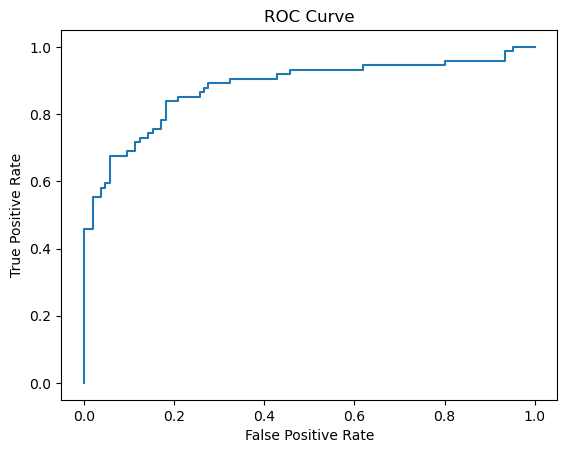

In [94]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()